In [1]:
import torch
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

# import skimage
# import cv2
from ultralytics import YOLO
import glob
import cv2
import skimage
## 1. Extract the scp for train and val
import json
from pathlib import Path
import re
import tqdm
import os
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data_dir  = "/DKUdata/tangbl/courses/CS302_CV/final_project/data/content/UA-DETRAC/DETRAC_Upload/images/train" # change this to your data files

data_files = sorted(glob.glob(f"{data_dir}/*40192*"), key = lambda x: int(re.match(f"MVI_\d+_img(\d+)", Path(x).stem).group(1)))
print(len(data_files))

2195


In [13]:
line = 400
thick = 2

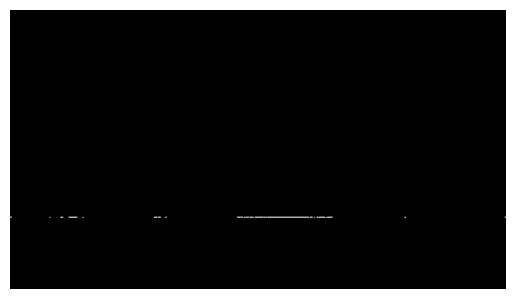

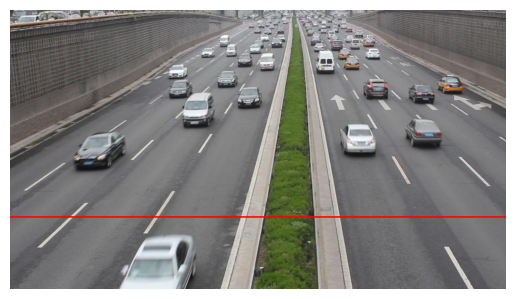

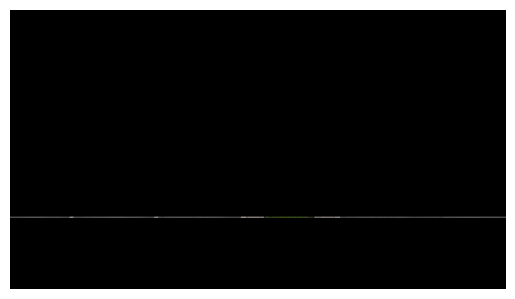

In [41]:
backSub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=False)
for frame in data_files[600:610]:
    backSub.apply(skimage.io.imread(frame)[line: line+thick])

frame = data_files[650]

result = np.zeros((540, 960))
img_origin = skimage.io.imread(frame)
img = img_origin[line: line+thick] # [2, 960]

fg_mask = backSub.apply(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

result[line:line+thick] = fg_mask
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

cv2.line(img_origin, (0, 400), (959, 400), (255, 0,0 ), 2)

plt.imshow(img_origin)
plt.axis('off')
plt.show()

result = np.zeros((540, 960, 3))
result[line:line+thick]  =skimage.io.imread(frame)[line:line+thick]
result = np.uint8(result)

plt.imshow(result)
plt.axis('off')
plt.show()

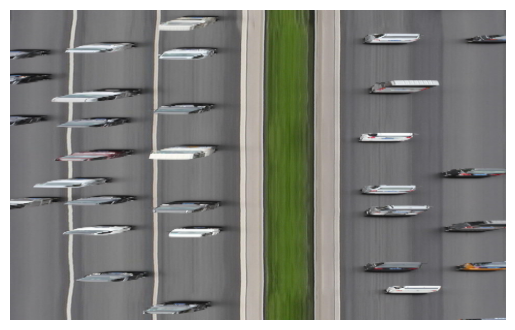

In [43]:
frames = data_files
res = []
color = []
backSub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=False)
for f in frames[600:900]:
    img = skimage.io.imread(f)
    img = img[400:402]
    fg_mask = backSub.apply(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    # Noise removal with morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

    # line = fg_mask[400:402] # [2, H, 3]
    res.append(fg_mask)
    color.append(img)
res = np.concatenate(res, axis = 0)
color = np.concatenate(color, axis = 0)
plt.imshow(color)
plt.axis("off")
plt.show()

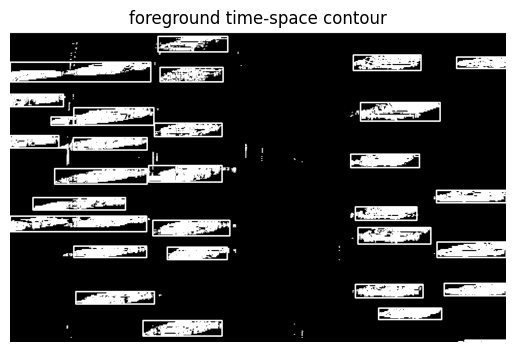

In [45]:
## Detect countours
from copy import deepcopy
rec_copy = deepcopy(res)
color_copy = deepcopy(color)
contours, _ = cv2.findContours(deepcopy(rec_copy), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # print(x,y,w,h)
    if w > 40 and w < 400 and h < 50:
        cv2.rectangle(rec_copy, (x, y), (x + w, y + h), (255), 2)
plt.imshow(rec_copy, cmap='gray')
plt.axis("off")
plt.xlabel("space")
plt.ylabel("time")
plt.title("foreground time-space contour")
plt.xticks([])
plt.yticks([])
plt.show()

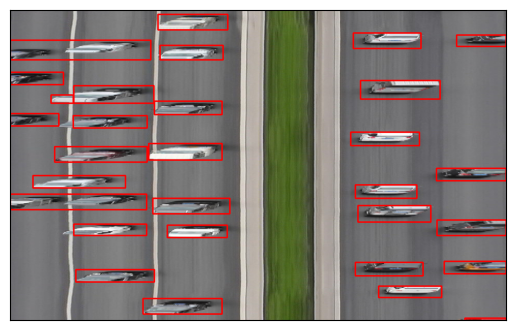

In [44]:
## Detect countours
from copy import deepcopy
rec_copy = deepcopy(res)
color_copy = deepcopy(color)
contours, _ = cv2.findContours(deepcopy(rec_copy), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # print(x,y,w,h)
    if w > 40 and w < 400 and h < 50:
        cv2.rectangle(color_copy, (x, y), (x + w, y + h), (255), 2)
plt.imshow(color_copy, cmap='gray')
# plt.axis("off")
# plt.xlabel("space")
# plt.ylabel("time")
# plt.title("foreground time-space contour")
plt.xticks([])
plt.yticks([])
plt.show()